# Traffic sign recognition with CNNs
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

We will be using floydhub, so we can load the data from its imput directory. The data comes as 32x32x3 images, so there is no need to resize any of them. 


In [269]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Exploring the dataset

The pickled data is a dictionary with 4 key/value pairs:
* 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels)
* 'labels' is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id
* 'sizes' is a list containing tuples, (width, height) representing the original width and height the image
* 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 
**THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


In [270]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0] 

# Number of validation examples 
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_test.shape[1:3]
image_size = image_shape[0]
# How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(train['labels']))
#sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape = {} x {}".format(image_shape[0], image_shape[1]))
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


## Visualize Data

* Plotting a bar chart to see how balanced our data set is. 
* View sample images with labels from the dataset to check a correct instance-label assignment.



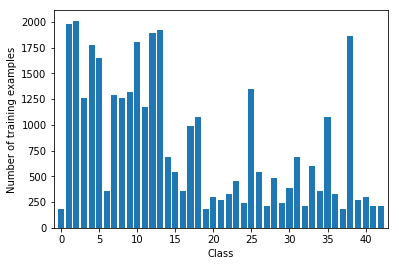

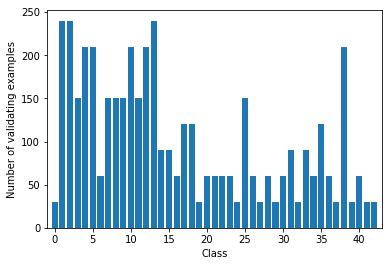

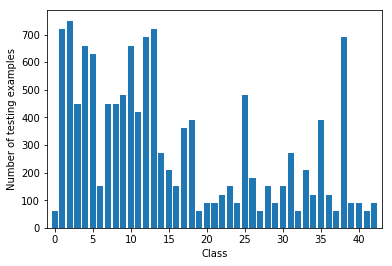

In [241]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sign_classes1, class_indices1, class_counts1 = np.unique(y_train, return_index = True, return_counts = True)
sign_classes2, class_indices2, class_counts2 = np.unique(y_valid, return_index = True, return_counts = True)
sign_classes3, class_indices3, class_counts3 = np.unique(y_test, return_index = True, return_counts = True)
#bar plot of the data distribution for the training set
plt.figure()
plt.bar( np.arange( 43 ), class_counts1, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()
#bar plot of the data distribution for the validating set
plt.figure()
plt.bar( np.arange( 43 ), class_counts2, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of validating examples')
plt.xlim([-1, 43])
plt.show()
#bar plot of the data distribution for the testing set
plt.figure()
plt.bar( np.arange( 43 ), class_counts3, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of testing examples')
plt.xlim([-1, 43])
plt.show()


Class 0: Speed limit (20km/h)                                180 samples


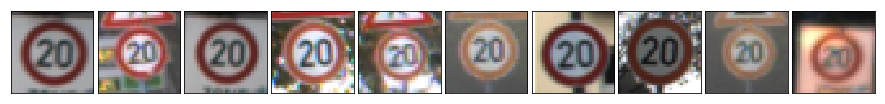

________________________________________________________________________________

Class 1: Speed limit (30km/h)                                1980 samples


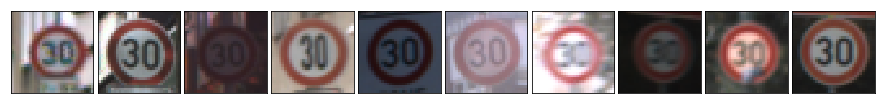

________________________________________________________________________________

Class 2: Speed limit (50km/h)                                2010 samples


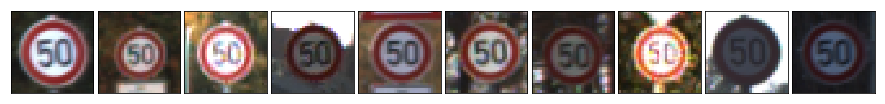

________________________________________________________________________________

Class 3: Speed limit (60km/h)                                1260 samples


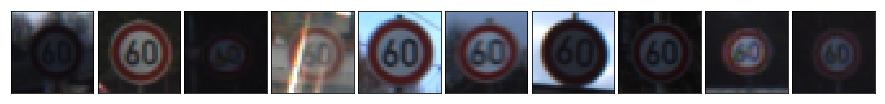

________________________________________________________________________________

Class 4: Speed limit (70km/h)                                1770 samples


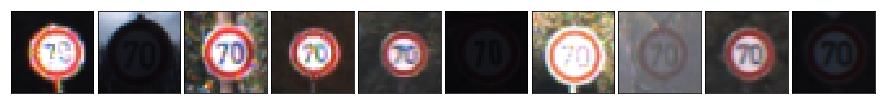

________________________________________________________________________________

Class 5: Speed limit (80km/h)                                1650 samples


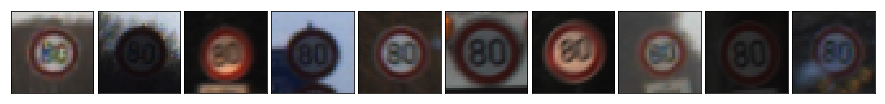

________________________________________________________________________________

Class 6: End of speed limit (80km/h)                         360 samples


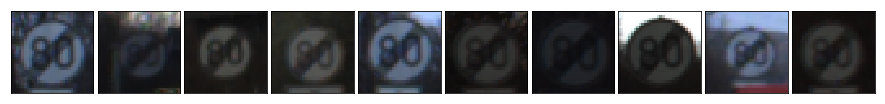

________________________________________________________________________________

Class 7: Speed limit (100km/h)                               1290 samples


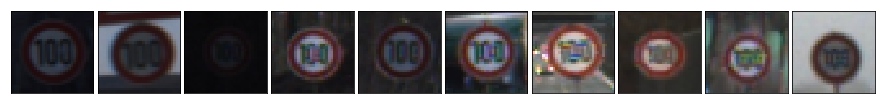

________________________________________________________________________________

Class 8: Speed limit (120km/h)                               1260 samples


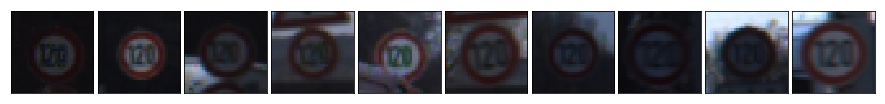

________________________________________________________________________________

Class 9: No passing                                          1320 samples


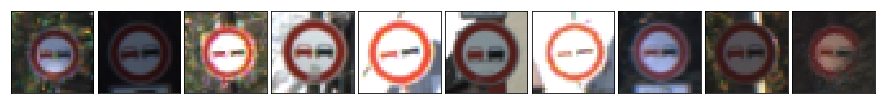

________________________________________________________________________________

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


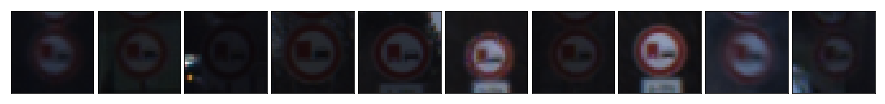

________________________________________________________________________________

Class 11: Right-of-way at the next intersection               1170 samples


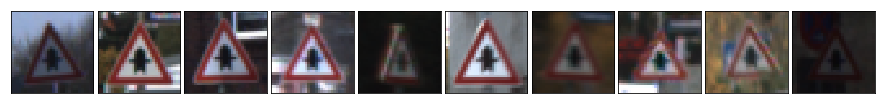

________________________________________________________________________________

Class 12: Priority road                                       1890 samples


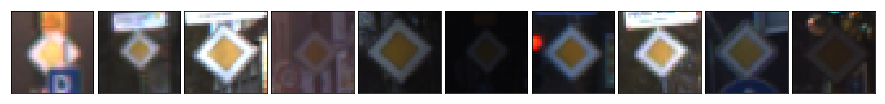

________________________________________________________________________________

Class 13: Yield                                               1920 samples


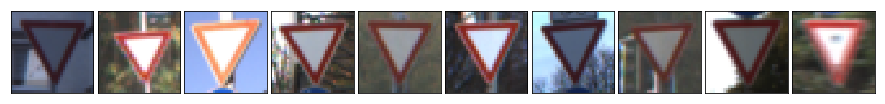

________________________________________________________________________________

Class 14: Stop                                                690 samples


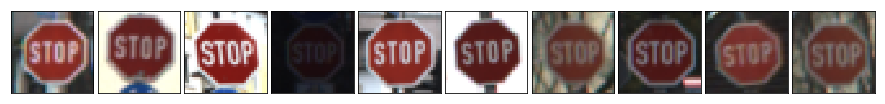

________________________________________________________________________________

Class 15: No vehicles                                         540 samples


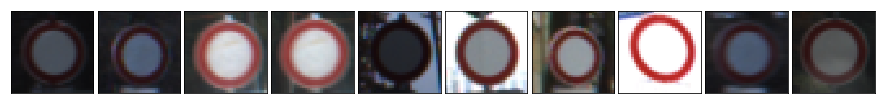

________________________________________________________________________________

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


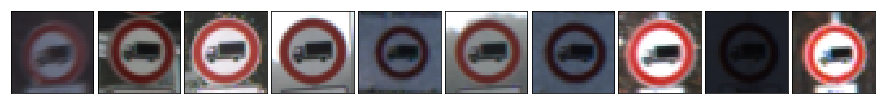

________________________________________________________________________________

Class 17: No entry                                            990 samples


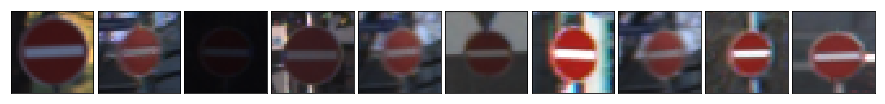

________________________________________________________________________________

Class 18: General caution                                     1080 samples


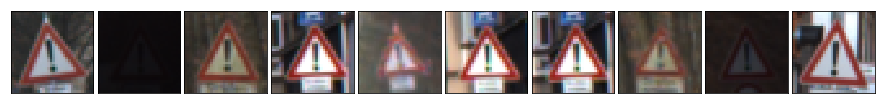

________________________________________________________________________________

Class 19: Dangerous curve to the left                         180 samples


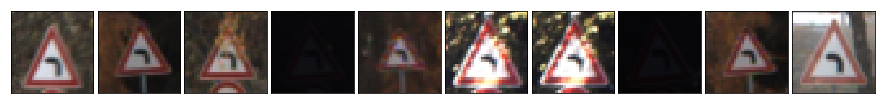

________________________________________________________________________________

Class 20: Dangerous curve to the right                        300 samples


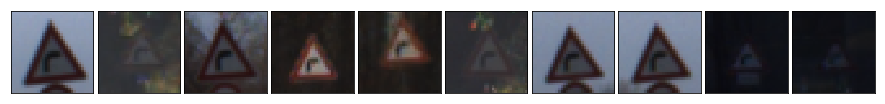

________________________________________________________________________________

Class 21: Double curve                                        270 samples


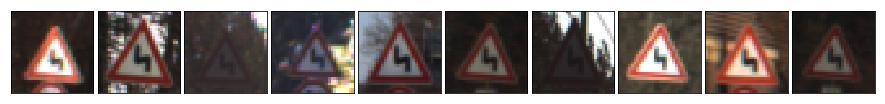

________________________________________________________________________________

Class 22: Bumpy road                                          330 samples


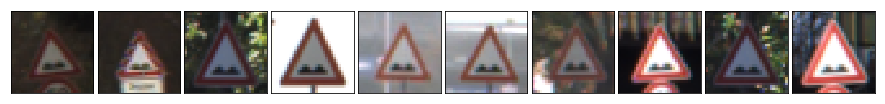

________________________________________________________________________________

Class 23: Slippery road                                       450 samples


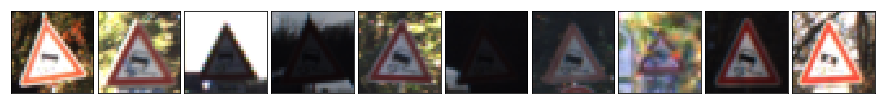

________________________________________________________________________________

Class 24: Road narrows on the right                           240 samples


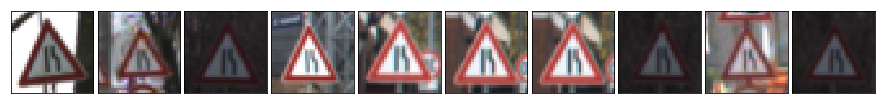

________________________________________________________________________________

Class 25: Road work                                           1350 samples


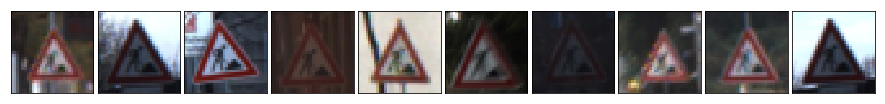

________________________________________________________________________________

Class 26: Traffic signals                                     540 samples


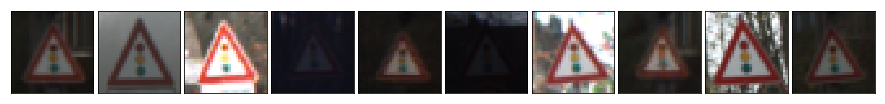

________________________________________________________________________________

Class 27: Pedestrians                                         210 samples


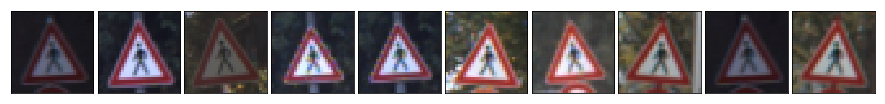

________________________________________________________________________________

Class 28: Children crossing                                   480 samples


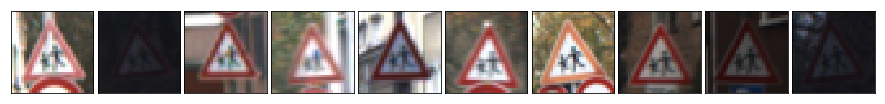

________________________________________________________________________________

Class 29: Bicycles crossing                                   240 samples


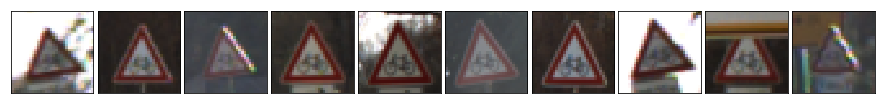

________________________________________________________________________________

Class 30: Beware of ice/snow                                  390 samples


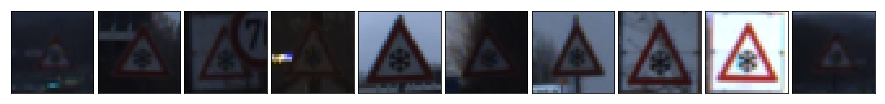

________________________________________________________________________________

Class 31: Wild animals crossing                               690 samples


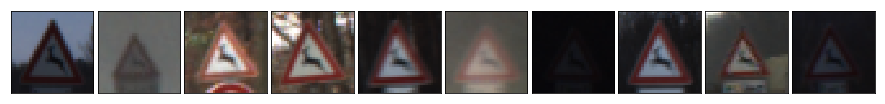

________________________________________________________________________________

Class 32: End of all speed and passing limits                 210 samples


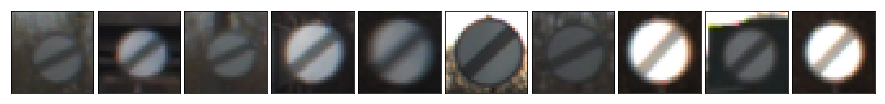

________________________________________________________________________________

Class 33: Turn right ahead                                    599 samples


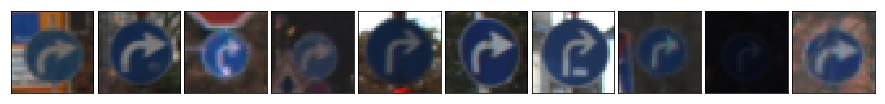

________________________________________________________________________________

Class 34: Turn left ahead                                     360 samples


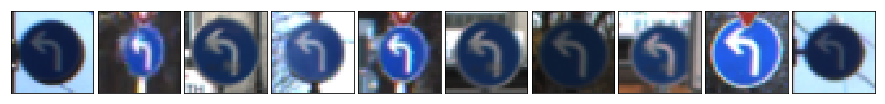

________________________________________________________________________________

Class 35: Ahead only                                          1080 samples


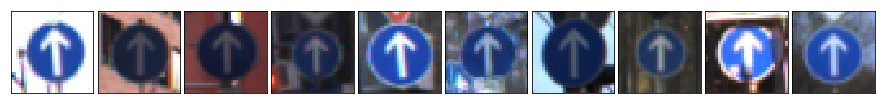

________________________________________________________________________________

Class 36: Go straight or right                                330 samples


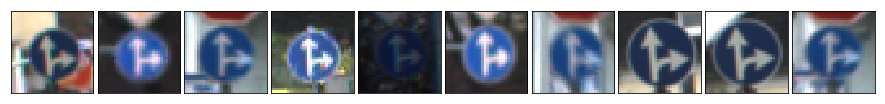

________________________________________________________________________________

Class 37: Go straight or left                                 180 samples


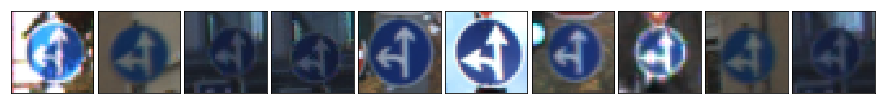

________________________________________________________________________________

Class 38: Keep right                                          1860 samples


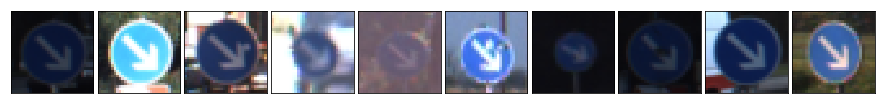

________________________________________________________________________________

Class 39: Keep left                                           270 samples


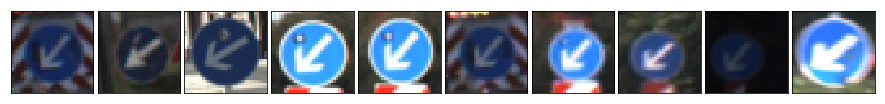

________________________________________________________________________________

Class 40: Roundabout mandatory                                300 samples


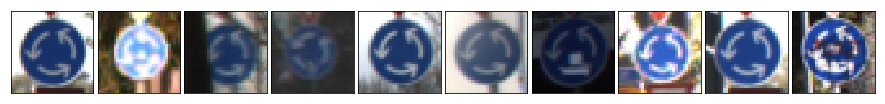

________________________________________________________________________________

Class 41: End of no passing                                   210 samples


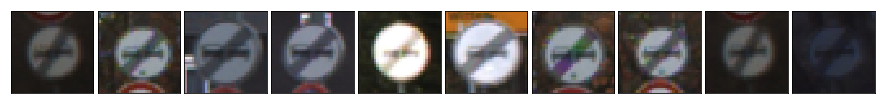

________________________________________________________________________________

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


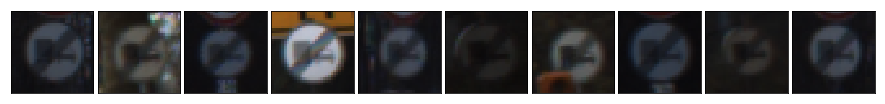

________________________________________________________________________________



In [271]:
label_names = pd.read_csv("signnames.csv").values[:, 1]

col_width = max(len(name) for name in label_names)

for c, c_index, c_count in zip(sign_classes1, class_indices1, class_counts1):
    print("Class %i: %-*s  %s samples" % (c, col_width, label_names[c], str(c_count)))
    fig = plt.figure(figsize = (12, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]], cmap = 'gray')
    plt.show()
    print("________________________________________________________________________________\n")


## Preprocess Data

Shuffle the training data.



In [236]:
def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle 
    between two classes when flipped, so for those we extend existing datasets as well.
    
    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.    
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 15, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

In [237]:
X_train, y_train = flip_extend(X_train, y_train)
X_train.shape

(46588, 32, 32, 3)

In [264]:
# convert the images to a single channel grey scale
X_train = 0.299 * X_train[:, :, :, 0] + 0.587 * X_train[:, :, :, 1] + 0.114 * X_train[:, :, :, 2]
X_valid = 0.299 * X_valid[:, :, :, 0] + 0.587 * X_valid[:, :, :, 1] + 0.114 * X_valid[:, :, :, 2]
X_test = 0.299 * X_test[:, :, :, 0] + 0.587 * X_test[:, :, :, 1] + 0.114 * X_test[:, :, :, 2]

In [266]:
# normalise all of the images
X_train = (X_train / 255).astype(np.float32)
X_valid = (X_valid / 255.).astype(np.float32)
X_test = (X_test / 255.).astype(np.float32)

In [156]:
# add an extra dimension to the array to make it compatible with the existing CNN architecture
X_train = X_train.reshape(X_train.shape + (1,))
X_valid = X_valid.reshape(X_valid.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [8]:
# shuffle the dataset
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [92]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since our postprocessed images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [104]:
from tensorflow.contrib.layers import flatten
keep_prob=0.5

# preforms a convolution with strides of 1 as a default and uses the relu activation function to give outputs
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding = 'VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# preforms maxpooling with a patch size and a stride of 2
def maxpool(x, k=2):
    x=tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
    return x


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. Relu Activation.
    weight_c1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    bias_c1 = tf.Variable(tf.truncated_normal([6]))
    x=conv2d(x, weight_c1, bias_c1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = maxpool(x)
    
    
    # Layer 2: Convolutional. Output = 10x10x16. Relu Activation.
    weight_c2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    bias_c2 = tf.Variable(tf.truncated_normal([16]))
    x=conv2d(x, weight_c2, bias_c2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = maxpool(x)
    x = tf.nn.dropout(x, 0.8)
    
    # Flatten. Input = 5x5x16. Output = 400.
    x = tf.contrib.layers.flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    weight_f3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    bias_f3 = tf.Variable(tf.truncated_normal([120]))
    x = tf.add(tf.matmul(x, weight_f3), bias_f3)
    
    # Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    weight_f4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    bias_f4 = tf.Variable(tf.truncated_normal([84]))
    x = tf.add(tf.matmul(x, weight_f4), bias_f4)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    weight_f5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    bias_f5 = tf.Variable(tf.truncated_normal([43]))
    logits = tf.add(tf.matmul(x, weight_f5), bias_f5)
    return logits

## LeCunn architecture

After experimenting with the LeNet network, it was found to be too deep which caused too much overfitting, which is why I decided to adopt a new architecture which can be found in this [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 
![LeCunn Architecture](./images/lecunn.png)
Source: Pierre Sermanet and Yann LeCun

In [179]:
def LeCunn(x): 
    """Carries out the LeCunn architecture, which is based on:
     * 3 conv layers
     * concatenating
     * flattning 
     * fully conected layer
     * dropout
     returns logits """
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob=0.5
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weight_c1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma), name = "W1")
    bias_c1 = tf.Variable(tf.truncated_normal([6]))
    x=conv2d(x, weight_c1, bias_c1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = maxpool(x)
    layer1 = x
    
    # Layer 2: Convolutional. Output = 10x10x16.
    weight_c2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma), name = "W2")
    bias_c2 = tf.Variable(tf.truncated_normal([16]))
    x=conv2d(x, weight_c2, bias_c2)
    

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = maxpool(x)
    layer2 = x
    
    # Layer 3: Convolutional. Output = 1x1x400.
    weight_c3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name = "W3")
    bias_c3 = tf.Variable(tf.truncated_normal([400]))
    x = conv2d(x, weight_c3, bias_c3)

    layer3 = x

    # Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
   
    
    # Flatten x. Input = 1x1x400. Output = 400.
    layer3flat = flatten(layer3)
    
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([layer3flat, layer2flat], 1)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    weights_4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name = "W4")
    bias_4 = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(x, weights_4), bias_4)
    
    return logits

## Features and Labels
Train LeCunn to classify traffic signs.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.



In [180]:
# clear the tf graph
tf.reset_default_graph() 

# set up the placeholders for imput and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# use one-hot encoding for the labels
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline

Creating a training pipeline that uses the model to classify our data.


In [181]:
# set up the learning rate
rate = 0.0001

# run the LeCunn net with a placeholder x
logits = LeCunn(x)
# use softmax activation and cross entorpy to find the loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
# calculate the loss
loss_operation = tf.reduce_mean(cross_entropy)
# use ADAM Optimizer for backpropagation
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate the loss and accuracy of the model for a given dataset.


In [182]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        if (i+1)%1 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
            print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.999
Validation Accuracy = 0.922

EPOCH 2 ...
Train Accuracy = 0.999
Validation Accuracy = 0.927

EPOCH 3 ...
Train Accuracy = 0.999
Validation Accuracy = 0.926

EPOCH 4 ...
Train Accuracy = 0.999
Validation Accuracy = 0.933

EPOCH 5 ...
Train Accuracy = 0.999
Validation Accuracy = 0.925

EPOCH 6 ...
Train Accuracy = 0.999
Validation Accuracy = 0.930

EPOCH 7 ...
Train Accuracy = 0.999
Validation Accuracy = 0.927

EPOCH 8 ...
Train Accuracy = 0.999
Validation Accuracy = 0.930

EPOCH 9 ...
Train Accuracy = 0.999
Validation Accuracy = 0.931

EPOCH 10 ...
Train Accuracy = 0.999
Validation Accuracy = 0.933

Model saved


## Log 

    1. - EPOCHS = 20, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.001   ==> no preprocessing
        Validation accuracy = 0.866
    2. - EPOCHS = 20, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.001   ==> after grayscale conversion
        Validation accuracy = 0.868
    3. - EPOCHS = 20, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.001   ==> after normalization
        Validation accuracy = 0.85
    4. - EPOCHS = 100, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.0003, grayscale & normalization
        Validation accuracy = 0.882
    5. - EPOCHS = 100, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.001, grayscale & normalization
       - implementing additional dropout before flattening with keep_prob = 0.8
        Validation accuracy = 0.911
    6. - EPOCHS = 200, BATCH_SIZE = 128, keep_prob = 0.5, learn_rate = 0.0008, grayscale & normalization
        Validation accuracy = 0.866  ==> overfitting
    7. - implementing new modified LaNet2 
        Validation accuracy = 0.909
    8. - 150 epochs and 0.0008 rate 
        Validation accuracy = 92.6
    9. - First training at high learning rate of 0.001 for 250 epochs and then fine tuning at learning rate 0.0001 for 10 epochs
        Validation accuracy = 0.933
        
        
        

## Evaluate the Model
Evaluating the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


## Test a Model on New Images

### Load and Output the Images

(15, 32, 32, 3)


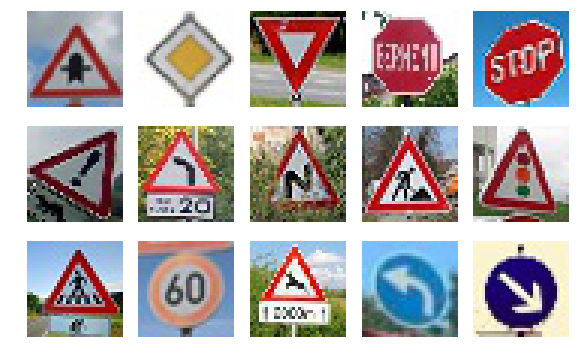

In [245]:
import matplotlib.image as mpimg

import cv2

fig, axs = plt.subplots(3,5, figsize=(10, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []
j=0
for i in os.listdir('./test_images'):
    image = cv2.imread('./test_images/' + i)
    axs[j].axis('off')
    axs[j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)
    j+=1
    
my_images = np.asarray(my_images)
my_images = my_images_proc

print(my_images_proc.shape)


## Preprocessing the images

In [246]:
my_images = 0.299 * my_images[:, :, :, 0] + 0.587 * my_images[:, :, :, 1] + 0.114 * my_images[:, :, :, 2]
my_images = (my_images / 255).astype(np.float32)
my_images_processed = my_images

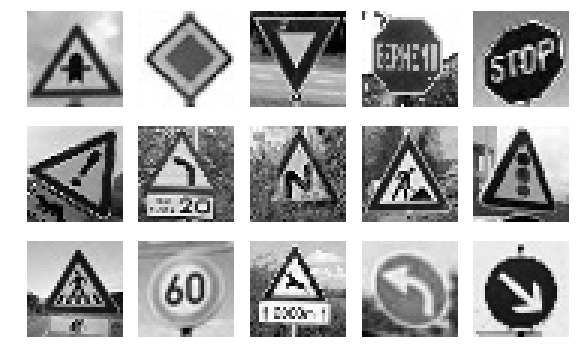

In [247]:
fig, axs = plt.subplots(3,5, figsize=(10, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

j=0
for i in my_images:
    
    axs[j].axis('off')
    axs[j].imshow(i, cmap='gray')
    j+=1


In [248]:
print('shape after preprocessing: ', my_images.shape)
my_images = my_images.reshape(my_images.shape + (1,))
print('adjusted shape: ', my_images.shape)

shape after preprocessing:  (15, 32, 32)
adjusted shape:  (15, 32, 32, 1)


## Classifying and evaluating the accuracy

In [263]:
my_labels = [11, 12, 13, 14, 14, 18, 19, 21, 25, 26, 27, 3, 31, 34, 38]

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    my_accuracy = evaluate(my_images, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.667


## Analyze Performance

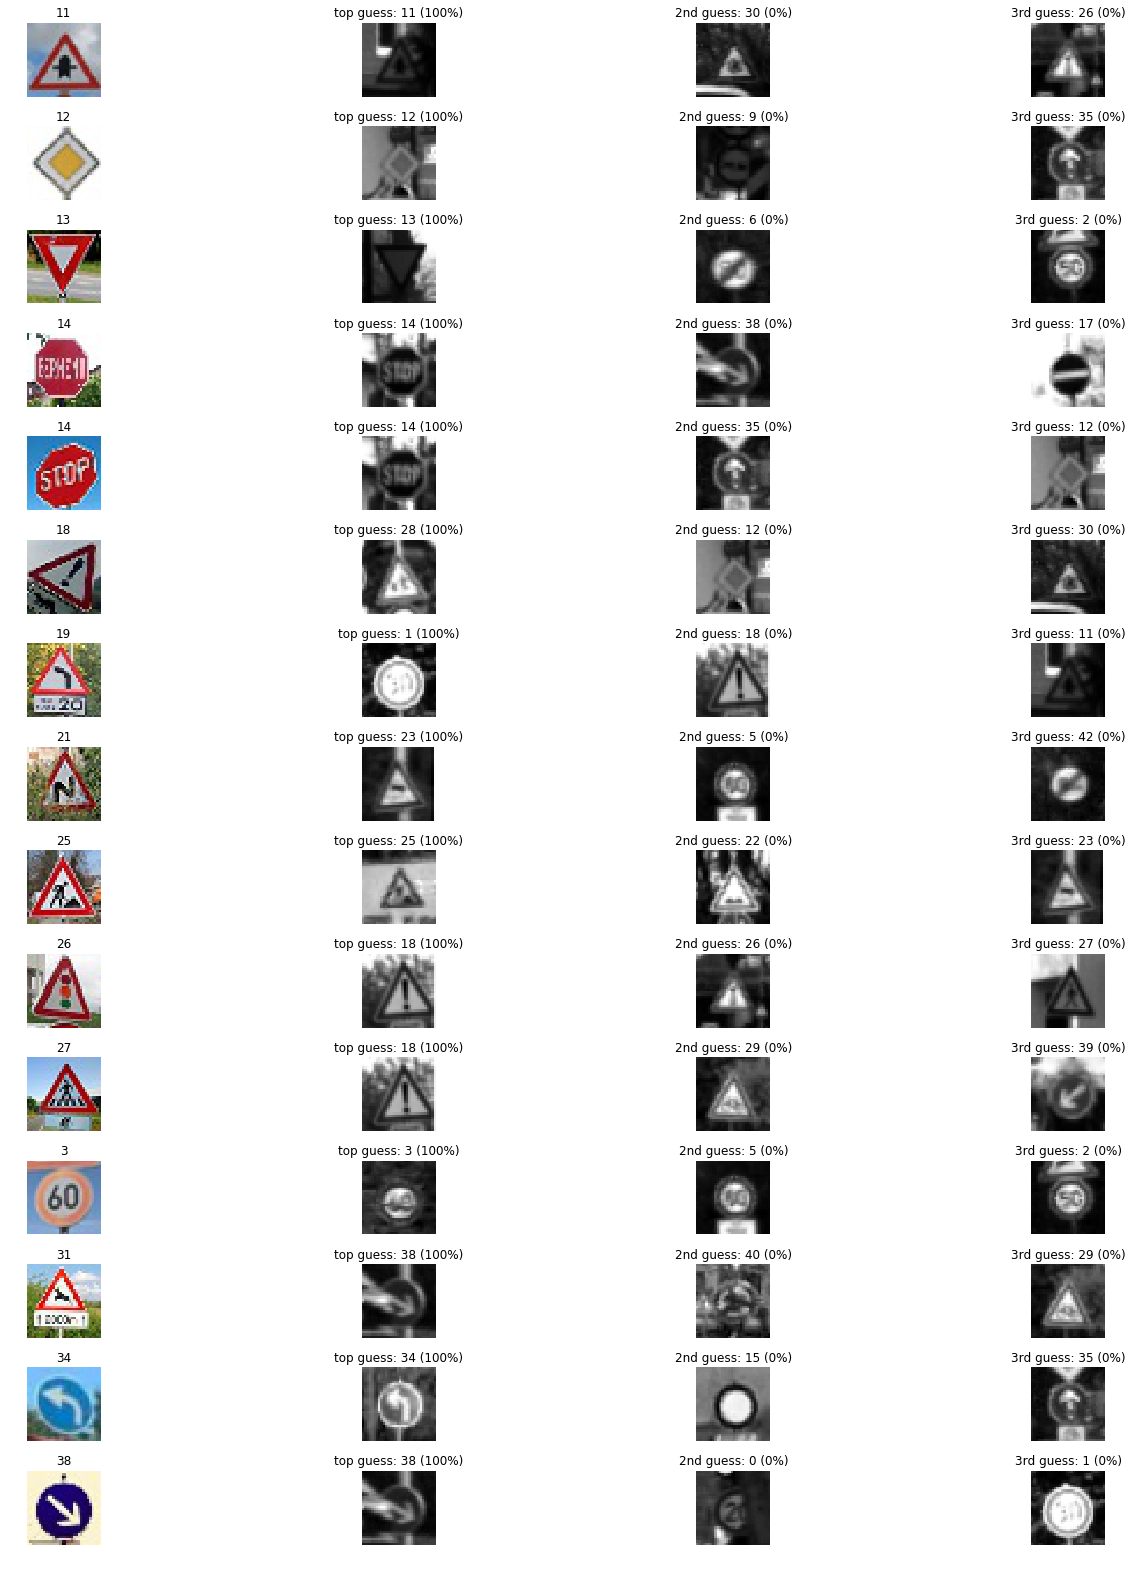

In [267]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images})
    my_top_k = sess.run(top_k, feed_dict={x: my_images})

    
    fig, axs = plt.subplots(len(my_images_proc),4, figsize=(24, 28))
    fig.subplots_adjust(hspace = .4, wspace=.00001)
    axs = axs.ravel()

    for i, image in enumerate(my_images_proc):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title(my_labels[i])
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Further discussion and suggestions for improvement is included in the writeup file. 